In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
df = load_iris()
dir(df)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_df = pd.DataFrame(df.data, columns=df.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df['target'] = df.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris_df['flower_name'] = iris_df.target.apply(lambda x : df.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
df0 = iris_df[iris_df.target == 0]
df1 = iris_df[iris_df.target == 1]
df2 = iris_df[iris_df.target == 2]

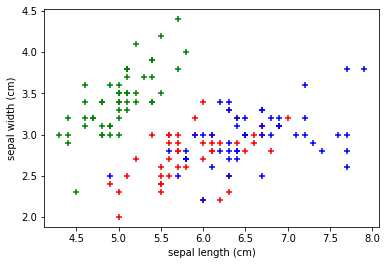

In [13]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker='+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='blue', marker='+')

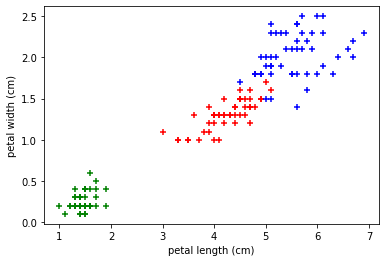

In [14]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue', marker='+')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = iris_df.drop(['target', 'flower_name'], axis=1)
y = iris_df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.svm import SVC
model = SVC()

In [20]:
model.fit(X_train, y_train)

SVC()

In [21]:
model.score(X_test, y_test)

0.9666666666666667

In [23]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 1])

In [26]:
# Compare the output with Samples
output = pd.DataFrame(y_test[0:10])
output['predicted'] = y_pred[0:10]
#output['difference'] = output['predicted'] - output['class']
print(output,"\n")

     target  predicted
8         0          0
52        1          1
148       2          2
2         0          0
130       2          2
101       2          2
44        0          0
25        0          0
92        1          1
32        0          0 

